In [1]:
import pandas as pd
import geopandas as gpd

df = pd.read_excel('data/parc_pl_commune_2022.xlsx', skiprows=3)
df['department'] = df['Code commune de résidence'].str[:2]
df['2022'] = df['2022'].astype(int)

km_p_day = 210
kg_per_km = 12.5
n_trucks = 10_000

p_dep = (
    (df.groupby('department')['2022'].sum()
    * n_trucks / df.groupby('department')['2022'].sum().sum()
    * km_p_day
    / kg_per_km
    ) / 1000
    )

gdf = gpd.read_file('data/departements.geojson')
gdf = gdf.merge(p_dep, left_on='code', right_index=True)

[]

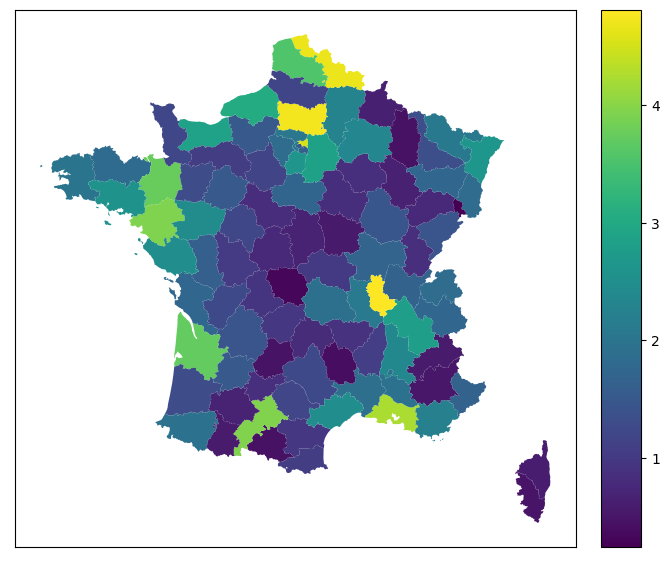

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1)
gdf.plot(column='2022', ax=ax, legend=True, cax=cax)

fig.set_size_inches(8, 8)
fig.set_tight_layout(tight=True)

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])